# 1. Data Exploration - Airbnb New User Booking Prediction

## Objective
Load and inspect the structure, quality, and shape of all datasets for the Airbnb New User Booking Prediction project.

## Import Required Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

# Set plotting style
sns.set_palette('viridis')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

## Load Datasets

We'll load the following datasets:
- `train_users_2.csv`: Contains training data with user profiles and destination labels
- `test_users.csv`: Contains test data with user profiles (without labels)
- `sessions.csv`: Contains session data for users

In [9]:
# Define file paths
train_path = '../train_users_2.csv'
test_path = '../test_users.csv'
sessions_path = '../sessions.csv'

# Load train data
train_df = pd.read_csv(train_path)
print(f"Train data shape: {train_df.shape}")

# Load test data
test_df = pd.read_csv(test_path)
print(f"Test data shape: {test_df.shape}")

# Load sessions data (with low_memory=False to avoid mixed dtype warning)
sessions_df = pd.read_csv(sessions_path, low_memory=False)
print(f"Sessions data shape: {sessions_df.shape}")

Train data shape: (213451, 16)
Test data shape: (62096, 15)
Sessions data shape: (10567737, 6)


## Data Overview - Training Data

Let's look at the structure of the training data.

In [4]:
# Display head of training data
print("First 5 rows of training data:")
train_df.head()

First 5 rows of training data:


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.00,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.00,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.00,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.00,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [10]:
# Display column information
print("\nTraining data info:")
train_df.info()


Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-nu

In [11]:
# Display descriptive statistics for training data
print("\nTraining data descriptive statistics:")
train_df.describe().T


Training data descriptive statistics:


,count,mean,std,min,25%,50%,75%,max
timestamp_first_active,213451.00,20130850417367.26,9253717046.58,20090319043255.00,20121225073327.50,20130911061308.00,20140306082494.00,20140630235824.00
age,125461.00,49.67,155.67,1.00,28.00,34.00,43.00,2014.00
signup_flow,213451.00,3.27,7.64,0.00,0.00,0.00,0.00,25.00


In [7]:
# Check for missing values in training data
missing_values = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(train_df) * 100)

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

print("Missing values in training data:")
missing_df[missing_df['Missing Values'] > 0]

Missing values in training data:


,Missing Values,Percentage
date_first_booking,124543,58.35
age,87990,41.22
first_affiliate_tracked,6065,2.84


A LOT of Missing Data!

## Data Overview - Test Data

In [12]:
# Display head of test data
print("First 5 rows of test data:")
test_df.head()

First 5 rows of test data:


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.00,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [13]:
# Check for missing values in test data
missing_values_test = test_df.isnull().sum().sort_values(ascending=False)
missing_percent_test = (missing_values_test / len(test_df) * 100)

missing_df_test = pd.DataFrame({
    'Missing Values': missing_values_test,
    'Percentage': missing_percent_test
})

print("Missing values in test data:")
missing_df_test[missing_df_test['Missing Values'] > 0]

Missing values in test data:


,Missing Values,Percentage
date_first_booking,62096,100.00
age,28876,46.50
first_affiliate_tracked,20,0.03


All *date_first_booking* are missing!!

## Data Overview - Sessions Data

In [14]:
# Display head of sessions data
print("First 5 rows of sessions data:")
sessions_df.head()

First 5 rows of sessions data:


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.00
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.00
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.00
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.00
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.00


In [15]:
# Display column information
print("\nSessions data info:")
sessions_df.info()


Sessions data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   action         object 
 2   action_type    object 
 3   action_detail  object 
 4   device_type    object 
 5   secs_elapsed   float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [16]:
# Check for missing values in sessions data
missing_values_sessions = sessions_df.isnull().sum().sort_values(ascending=False)
missing_percent_sessions = (missing_values_sessions / len(sessions_df) * 100)

missing_df_sessions = pd.DataFrame({
    'Missing Values': missing_values_sessions,
    'Percentage': missing_percent_sessions
})

print("Missing values in sessions data:")
missing_df_sessions[missing_df_sessions['Missing Values'] > 0]

Missing values in sessions data:


,Missing Values,Percentage
action_type,1126204,10.66
action_detail,1126204,10.66
secs_elapsed,136031,1.29
action,79626,0.75
user_id,34496,0.33


## Check for Duplicates

In [17]:
# Check for duplicate user IDs in training data
print(f"Number of duplicate user IDs in training data: {train_df['id'].duplicated().sum()}")

# Check for duplicate user IDs in test data
print(f"Number of duplicate user IDs in test data: {test_df['id'].duplicated().sum()}")

Number of duplicate user IDs in training data: 0
Number of duplicate user IDs in test data: 0


Great, No Duplicates!

## Date Format Analysis

In [18]:
# Examine date formats in training data
print("Sample date_account_created values:")
print(train_df['date_account_created'].head())

print("\nSample timestamp_first_active values:")
print(train_df['timestamp_first_active'].head())

# Convert date_account_created to datetime
train_df['date_account_created'] = pd.to_datetime(train_df['date_account_created'])

# Convert timestamp_first_active to datetime
# The format appears to be YYYYMMDDHHMMSS
train_df['timestamp_first_active'] = pd.to_datetime(train_df['timestamp_first_active'].astype(str), format='%Y%m%d%H%M%S')

print("\nAfter conversion:")
print(train_df[['date_account_created', 'timestamp_first_active']].head())

Sample date_account_created values:
0    2010-06-28
1    2011-05-25
2    2010-09-28
3    2011-12-05
4    2010-09-14
Name: date_account_created, dtype: object

Sample timestamp_first_active values:
0    20090319043255
1    20090523174809
2    20090609231247
3    20091031060129
4    20091208061105
Name: timestamp_first_active, dtype: int64

After conversion:
  date_account_created timestamp_first_active
0           2010-06-28    2009-03-19 04:32:55
1           2011-05-25    2009-05-23 17:48:09
2           2010-09-28    2009-06-09 23:12:47
3           2011-12-05    2009-10-31 06:01:29
4           2010-09-14    2009-12-08 06:11:05


## Check for Extreme Values in Age

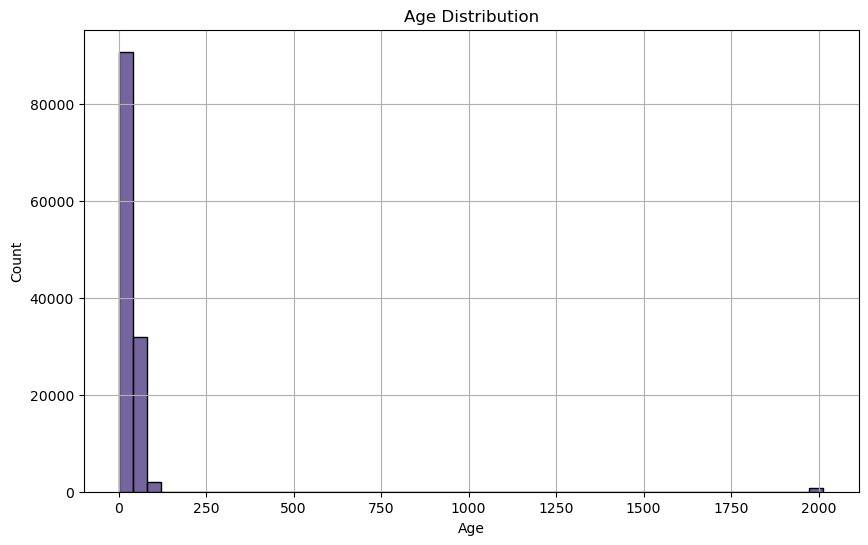

Age range: 1.0 - 2014.0
Number of users with extreme age values (< 14 or > 100): 2402


In [19]:
# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['age'].dropna(), bins=50)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Identify extreme values in age
print(f"Age range: {train_df['age'].min()} - {train_df['age'].max()}")

# Count users with age < 14 or > 100
extreme_age_count = ((train_df['age'] < 14) | (train_df['age'] > 100)).sum()
print(f"Number of users with extreme age values (< 14 or > 100): {extreme_age_count}")

## Visual Sanity Checks

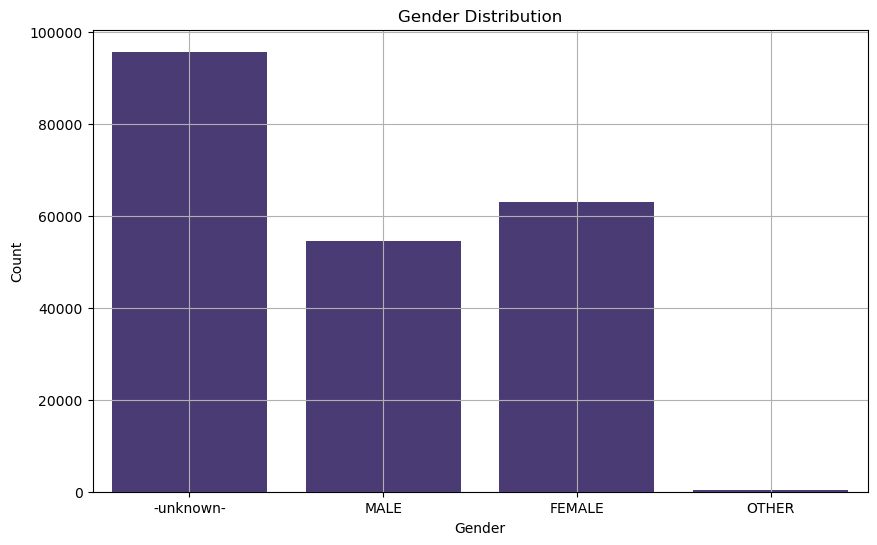

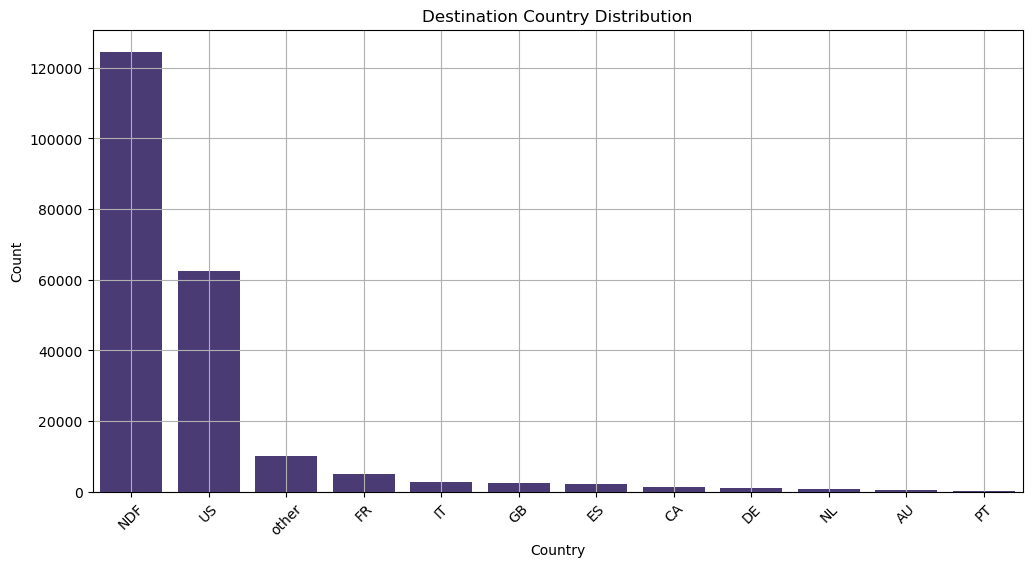

Destination country percentage:


country_destination
NDF     58.35
US      29.22
other    4.73
FR       2.35
IT       1.33
GB       1.09
ES       1.05
CA       0.67
DE       0.50
NL       0.36
AU       0.25
PT       0.10
Name: proportion, dtype: float64

In [20]:
# Gender distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=train_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Destination country counts
plt.figure(figsize=(12, 6))
destination_counts = train_df['country_destination'].value_counts()
sns.barplot(x=destination_counts.index, y=destination_counts.values)
plt.title('Destination Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Destination country percentage:")
destination_percentage = train_df['country_destination'].value_counts(normalize=True) * 100
destination_percentage

## Session Data Analysis

In [21]:
# Check unique action types in sessions data
unique_actions = sessions_df['action'].unique()
print(f"Number of unique action types: {len(unique_actions)}")
print("Sample action types:")
print(unique_actions[:10])

# Check unique action_types
unique_action_types = sessions_df['action_type'].unique()
print(f"\nNumber of unique action_types: {len(unique_action_types)}")
print("Action_types:")
print(unique_action_types)

# Check unique action_details
print(f"\nNumber of unique action_details: {len(sessions_df['action_detail'].unique())}")
print("Sample action_details:")
print(sessions_df['action_detail'].unique()[:10])

Number of unique action types: 360
Sample action types:
['lookup' 'search_results' 'personalize' 'index' 'similar_listings'
 'ajax_refresh_subtotal' 'show' 'header_userpic' 'ask_question' nan]

Number of unique action_types: 11
Action_types:
[nan 'click' 'data' 'view' 'submit' 'message_post' '-unknown-'
 'booking_request' 'partner_callback' 'booking_response' 'modify']

Number of unique action_details: 156
Sample action_details:
[nan 'view_search_results' 'wishlist_content_update' 'similar_listings'
 'change_trip_characteristics' 'p3' 'header_userpic' 'contact_host'
 'message_post' '-unknown-']
